## METHODS COMPARISON USING CIFAR100 WITH 10 CLASSES

On this file, the logistic regression proccess is done in order to compare it with the results of the Structure Predictions package. \
We find out that there are some considerable differences. 

For this exercice we use the CIFAR100 dataset provided by Keras. This is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 100 fine-grained classes that are grouped into 20 coarse-grained classes. 

In this file we do a subset of the dataset in order to have less categories. For this case, we implement a 10 categories subset as following.

In [1]:
from sklearn import metrics

In [2]:
from keras.datasets import cifar100
import matplotlib.pyplot as plt
import numpy as np

import time


# Download dataset of CIFAR-100 (Canadian Institute for Advanced Research)
(X_train,Y_train),(X_test,Y_test) = cifar100.load_data()
 
# Check the shape of the array
print('x_train shape:', X_train.shape)
print('x_test shape:', X_test.shape)
print('y_train shape:', Y_train.shape)
print('y_test shape:', Y_test.shape)
 
# Number of data set samples 
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
 
# Data format confirmation
print(type(X_test))
print(type(Y_test[0]))

2022-08-13 13:26:06.901949: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-08-13 13:26:06.905906: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-13 13:26:06.905919: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 1)
y_test shape: (10000, 1)
50000 train samples
10000 test samples
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### Organizing data

We just want the first 10 categories of the dataset, so that's why we create a new train dataset and test dataset with those labels as below

In [3]:
#   Subset for the CIFAR100 in order to have just 10 categories
#Training Dataset
sub_X_train = X_train[np.isin(Y_train, [0,1,2,3,4,5,6,7,8,9]).flatten()]
sub_Y_train = Y_train[np.isin(Y_train, [0,1,2,3,4,5,6,7,8,9]).flatten()]

#Test Dataset
sub_X_test = X_test[np.isin(Y_test, [0,1,2,3,4,5,6,7,8,9]).flatten()]
sub_Y_test = Y_test[np.isin(Y_test, [0,1,2,3,4,5,6,7,8,9]).flatten()]

In [4]:
print('Number of records for 10 classes X train',sub_X_train.shape)
print('Number of records for 10 classes X test',sub_X_test.shape)
print('Number of records for 10 classes Y train',sub_Y_train.shape)
print('Number of records for 10 classes Y test',sub_Y_test.shape)

Number of records for 10 classes X train (5000, 32, 32, 3)
Number of records for 10 classes X test (1000, 32, 32, 3)
Number of records for 10 classes Y train (5000, 1)
Number of records for 10 classes Y test (1000, 1)


In [5]:
print("First 5 entries of X_train",sub_X_train[0:5])
print("First 5 entries of X_test",sub_X_test[0:5])
print("First 5 entries of Y_train",sub_Y_train[0:5])
print("First 5 entries of Y_test",sub_Y_test[0:5])

First 5 entries of X_train [[[[250 250 248]
   [248 249 243]
   [247 248 239]
   ...
   [250 250 246]
   [250 250 246]
   [249 250 246]]

  [[250 251 245]
   [248 249 238]
   [247 247 234]
   ...
   [251 251 242]
   [251 252 243]
   [250 251 243]]

  [[251 251 244]
   [250 248 237]
   [250 245 233]
   ...
   [250 249 238]
   [250 249 240]
   [250 249 242]]

  ...

  [[221 213 191]
   [221 206 176]
   [225 207 181]
   ...
   [199 176 134]
   [207 193 165]
   [233 229 226]]

  [[225 223 204]
   [227 219 196]
   [229 216 200]
   ...
   [204 185 151]
   [212 201 180]
   [234 232 228]]

  [[233 233 226]
   [234 232 224]
   [235 230 225]
   ...
   [219 209 194]
   [223 216 207]
   [232 230 228]]]


 [[[ 43  49  46]
   [ 32  40  34]
   [ 87  89  47]
   ...
   [ 74  84  48]
   [ 43  51  30]
   [ 39  45  33]]

  [[ 44  47  51]
   [ 38  42  42]
   [ 59  61  32]
   ...
   [ 66  74  47]
   [ 40  47  31]
   [ 40  46  34]]

  [[ 45  45  50]
   [ 43  43  44]
   [ 44  47  30]
   ...
   [ 51  58  40]
 

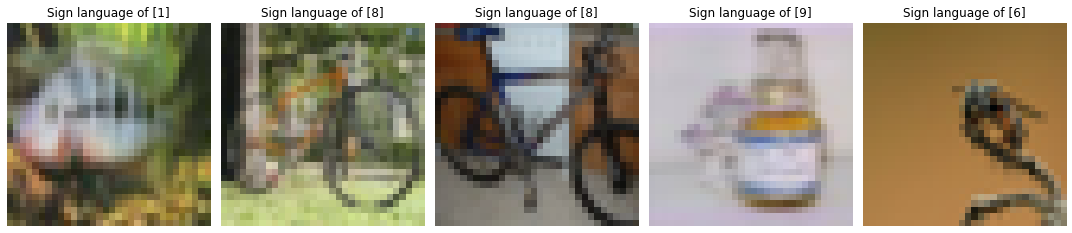

In [6]:
plt.figure(figsize=(15,5))
for i in range(1,6):
  plt.subplot(1,5,i)
  plt.imshow(sub_X_train[i,:,:],cmap='gray')
  plt.title('Sign language of {}'.format(sub_Y_train[i]))
  plt.axis('off')
  plt.tight_layout()
plt.show()

In [7]:
from sklearn.linear_model import LogisticRegression


For the Logistic Regression implementation, it's needed an X array with dimension <= 2. In this case, we have a dimension of 4, that's why we have to do a reshape as below

The same process has to be done for the other methods 

In [8]:
sub_X_test_or=sub_X_test
sub_X_train_or=sub_X_train

sub_X_train_rshp=sub_X_train.reshape(5000, 32*32*3) ## Reshaping data
sub_X_test_rshp=sub_X_test.reshape(1000, 32*32*3)   ## Reshaping data  

In [9]:
print(sub_X_train_rshp[0])

[250 250 248 ... 232 230 228]


### Logistic Regression method

In [10]:
lr_start_time=time.time()

In [11]:
logreg =  LogisticRegression()
logreg.fit(sub_X_train_rshp,sub_Y_train) ## fitting the logistic regression model

/home/daniel/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/daniel/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
y_pred=logreg.predict(sub_X_test_rshp)
y_pred

array([0, 6, 2, 0, 3, 9, 0, 6, 6, 0, 9, 5, 0, 6, 2, 5, 9, 9, 6, 6, 2, 0,
       0, 2, 4, 4, 1, 6, 6, 8, 0, 7, 1, 9, 6, 7, 0, 2, 0, 6, 3, 1, 9, 2,
       5, 8, 3, 5, 5, 6, 3, 6, 2, 0, 8, 5, 5, 1, 0, 2, 5, 4, 8, 1, 9, 6,
       1, 0, 1, 1, 5, 9, 3, 1, 5, 1, 2, 1, 1, 7, 1, 7, 1, 6, 7, 7, 9, 6,
       1, 2, 0, 1, 7, 9, 5, 1, 2, 8, 4, 7, 2, 1, 0, 1, 2, 1, 5, 1, 0, 7,
       8, 9, 8, 2, 3, 7, 7, 1, 1, 5, 7, 1, 9, 5, 0, 8, 2, 2, 3, 4, 5, 3,
       6, 5, 1, 2, 3, 0, 0, 7, 1, 5, 7, 0, 5, 5, 6, 0, 8, 5, 2, 8, 8, 8,
       1, 9, 5, 5, 9, 8, 9, 9, 5, 3, 9, 2, 2, 9, 8, 9, 4, 7, 1, 8, 4, 8,
       6, 3, 7, 2, 6, 0, 7, 5, 1, 5, 1, 9, 6, 1, 1, 7, 0, 5, 7, 6, 7, 6,
       1, 0, 9, 1, 5, 0, 5, 9, 1, 9, 1, 3, 2, 9, 9, 1, 5, 6, 6, 8, 0, 6,
       4, 3, 2, 3, 4, 8, 0, 0, 6, 7, 8, 3, 0, 7, 5, 3, 2, 1, 6, 4, 0, 5,
       8, 5, 7, 3, 4, 8, 1, 3, 6, 7, 0, 8, 9, 1, 0, 5, 8, 6, 4, 1, 7, 8,
       2, 4, 0, 0, 2, 7, 2, 9, 7, 2, 5, 8, 2, 2, 4, 2, 5, 4, 1, 8, 6, 9,
       1, 0, 3, 4, 0, 1, 9, 0, 2, 6, 6, 5, 8, 8, 5,

In [13]:
len(y_pred)

1000

In [14]:
len(sub_X_test)

1000

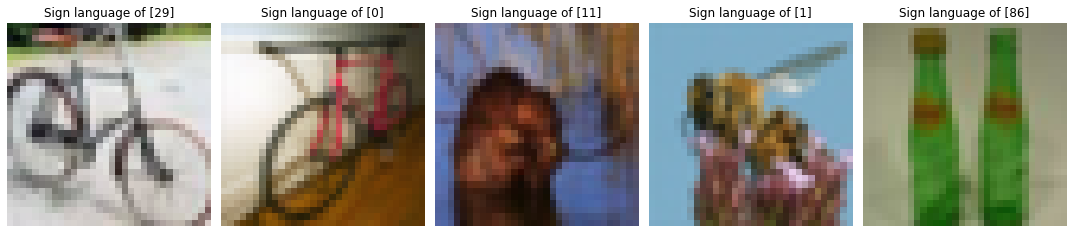

In [15]:
plt.figure(figsize=(15,5))
for i in range(1,6):
  plt.subplot(1,5,i)
  plt.imshow(sub_X_test[i,:,:],cmap='gray')
  plt.title('Sign language of {}'.format(Y_train[i]))
  plt.axis('off')
  plt.tight_layout()
plt.show()

#### Table for classification report and confusion

In [16]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score

In [17]:
logreg.score(sub_X_test_rshp,sub_Y_test) ## Overall accuracy score of the logistic regression model

0.407

In [18]:
lr_cm=confusion_matrix(y_pred,sub_Y_test) ## To obtain the confusion matrix
print(classification_report(y_pred,sub_Y_test))

print()
print("Execution Time %s seconds: " % (time.time() - lr_start_time))

              precision    recall  f1-score   support

           0       0.67      0.54      0.60       125
           1       0.66      0.53      0.59       125
           2       0.44      0.38      0.41       116
           3       0.20      0.30      0.24        67
           4       0.17      0.24      0.20        72
           5       0.31      0.28      0.30       109
           6       0.39      0.41      0.40        96
           7       0.38      0.37      0.37       104
           8       0.36      0.39      0.37        93
           9       0.49      0.53      0.51        93

    accuracy                           0.41      1000
   macro avg       0.41      0.39      0.40      1000
weighted avg       0.43      0.41      0.42      1000


Execution Time 8.180548429489136 seconds: 


In [19]:
lr_cm

array([[67,  8, 13,  3, 10,  8,  7,  3,  2,  4],
       [11, 66, 10,  4,  5, 12,  4,  6,  2,  5],
       [ 6, 10, 44,  5, 10, 11, 10,  2, 11,  7],
       [ 2,  0,  2, 20, 12,  4,  8,  8,  6,  5],
       [ 5,  0,  5, 14, 17,  8,  9,  9,  5,  0],
       [ 2,  7, 11,  8,  9, 31,  4,  5, 22, 10],
       [ 3,  3,  4,  7,  4,  7, 39, 18,  4,  7],
       [ 2,  3,  0, 23, 16,  2, 12, 38,  5,  3],
       [ 0,  3,  6, 12, 11, 12,  2,  1, 36, 10],
       [ 2,  0,  5,  4,  6,  5,  5, 10,  7, 49]])

In [20]:
f1_test = f1_score(y_pred, sub_Y_test, average='weighted')
print( "Test f1 score:", f1_test)

Test f1 score: 0.4165187057153184


In [21]:
y_pred

array([0, 6, 2, 0, 3, 9, 0, 6, 6, 0, 9, 5, 0, 6, 2, 5, 9, 9, 6, 6, 2, 0,
       0, 2, 4, 4, 1, 6, 6, 8, 0, 7, 1, 9, 6, 7, 0, 2, 0, 6, 3, 1, 9, 2,
       5, 8, 3, 5, 5, 6, 3, 6, 2, 0, 8, 5, 5, 1, 0, 2, 5, 4, 8, 1, 9, 6,
       1, 0, 1, 1, 5, 9, 3, 1, 5, 1, 2, 1, 1, 7, 1, 7, 1, 6, 7, 7, 9, 6,
       1, 2, 0, 1, 7, 9, 5, 1, 2, 8, 4, 7, 2, 1, 0, 1, 2, 1, 5, 1, 0, 7,
       8, 9, 8, 2, 3, 7, 7, 1, 1, 5, 7, 1, 9, 5, 0, 8, 2, 2, 3, 4, 5, 3,
       6, 5, 1, 2, 3, 0, 0, 7, 1, 5, 7, 0, 5, 5, 6, 0, 8, 5, 2, 8, 8, 8,
       1, 9, 5, 5, 9, 8, 9, 9, 5, 3, 9, 2, 2, 9, 8, 9, 4, 7, 1, 8, 4, 8,
       6, 3, 7, 2, 6, 0, 7, 5, 1, 5, 1, 9, 6, 1, 1, 7, 0, 5, 7, 6, 7, 6,
       1, 0, 9, 1, 5, 0, 5, 9, 1, 9, 1, 3, 2, 9, 9, 1, 5, 6, 6, 8, 0, 6,
       4, 3, 2, 3, 4, 8, 0, 0, 6, 7, 8, 3, 0, 7, 5, 3, 2, 1, 6, 4, 0, 5,
       8, 5, 7, 3, 4, 8, 1, 3, 6, 7, 0, 8, 9, 1, 0, 5, 8, 6, 4, 1, 7, 8,
       2, 4, 0, 0, 2, 7, 2, 9, 7, 2, 5, 8, 2, 2, 4, 2, 5, 4, 1, 8, 6, 9,
       1, 0, 3, 4, 0, 1, 9, 0, 2, 6, 6, 5, 8, 8, 5,

In [22]:
sub_X_train

array([[[[250, 250, 248],
         [248, 249, 243],
         [247, 248, 239],
         ...,
         [250, 250, 246],
         [250, 250, 246],
         [249, 250, 246]],

        [[250, 251, 245],
         [248, 249, 238],
         [247, 247, 234],
         ...,
         [251, 251, 242],
         [251, 252, 243],
         [250, 251, 243]],

        [[251, 251, 244],
         [250, 248, 237],
         [250, 245, 233],
         ...,
         [250, 249, 238],
         [250, 249, 240],
         [250, 249, 242]],

        ...,

        [[221, 213, 191],
         [221, 206, 176],
         [225, 207, 181],
         ...,
         [199, 176, 134],
         [207, 193, 165],
         [233, 229, 226]],

        [[225, 223, 204],
         [227, 219, 196],
         [229, 216, 200],
         ...,
         [204, 185, 151],
         [212, 201, 180],
         [234, 232, 228]],

        [[233, 233, 226],
         [234, 232, 224],
         [235, 230, 225],
         ...,
         [219, 209, 194],
        

### Structure Predictions method

We procceed to create execute the Structure predictions method in order to identify differences and get some conclusions.

Here we implement the class IOKR2 due to some issues:

In [23]:
# Implementation
import time
# from sklearn.model_selection import KFold
from sklearn.metrics.pairwise import linear_kernel, polynomial_kernel, rbf_kernel
# from sklearn.metrics import f1_score
import numpy as np
# import pandas as pd
# from stpredictions.datasets.load_data import load_bibtex
# from sklearn.model_selection import train_test_split
# import arff
from numpy.linalg import inv
# import os

# from line_profiler import LineProfiler

"""
Created on December 12, 2021
"""


class IOKR2:
    """
    Class used to apply Input and Output Kernel Regression
    """

    
    def __init__(self):
        """
        Initialization of the below parameters.
        Parameters
        ----------
        X_train :  sparse matrix - containing explanatory variables of the train set
        Y_train: sparse matrix - containing target variable of the train set
        Ky: output scalar kernel
        M: gram matrix on training set
        verbose: binary - display more parameters
        linear:
        """
        self.X_train = None
        self.Y_train = None
        self.Ky = None
        self.M = None
        self.verbose = 0
        self.input_kernel = None
        self.output_kernel = None

  
    def fit(self, X, Y, L, input_kernel='linear', input_kernel_param=None):
        """
        Model Fitting
        """

        # save input and output training data
        self.X_train, self.Y_train = X, Y

        # instantiate input kernel parameter when not given
        if input_kernel_param is None:
            if input_kernel == 'rbf':
                input_kernel_param = 1.
            elif input_kernel == 'polynomial':
                input_kernel_param = [3, None, 1]

        # define input kernel
        if input_kernel == 'linear':
            self.input_kernel = lambda A, B: linear_kernel(A, B)
        elif input_kernel == 'polynomial':
            self.input_kernel = lambda A, B: polynomial_kernel(A, B, degree=input_kernel_param[0],
                                                               gamma=input_kernel_param[1], coef0=input_kernel_param[2])
        elif input_kernel == 'rbf':
            self.input_kernel = lambda A, B: rbf_kernel(A, B, gamma=input_kernel_param)
        else:
            self.input_kernel = input_kernel

        # compute input gram matrix
        Kx = self.input_kernel(X, X)

        # kernel ridge regression training computation: n x n matrix inversion
        t0 = time.time()
        n = Kx.shape[0]
        self.M = np.linalg.inv(Kx + n * L * np.eye(n))
        if self.verbose > 0:
            print(f'Fitting time: {time.time() - t0} in s')

    def alpha(self, X_test):

        Kx = self.input_kernel(self.X_train, X_test)
        A = self.M.dot(Kx)

        return A


    def predict(self, X_test, Y_candidates, output_kernel='linear', output_kernel_param=None):

        """
        Model Prediction
        """

        # instantiate output kernel parameter when not given
        if output_kernel_param is None:
            if output_kernel == 'rbf':
                output_kernel_param = 1.
            elif output_kernel == 'polynomial':
                output_kernel_param = [3, None, 1]

        # define output kernel
        if output_kernel == 'linear':
            self.output_kernel = lambda A, B: linear_kernel(A, B)
        elif output_kernel == 'polynomial':
            self.output_kernel = lambda A, B: polynomial_kernel(A, B, degree=output_kernel_param[0],
                                                                gamma=output_kernel_param[1],
                                                                coef0=output_kernel_param[2])
        elif output_kernel == 'rbf':
            self.output_kernel = lambda A, B: rbf_kernel(A, B, gamma=output_kernel_param)
        else:
            self.output_kernel = output_kernel

        # compute output gram matrix
        Ky = self.output_kernel(self.Y_train, Y_candidates)

        # compute prediction
        t0 = time.time()
        Alpha = self.alpha(X_test)
        scores = Ky.transpose().dot(Alpha)
        idx_pred = np.argmax(scores, axis=0)
        Y_pred = Y_candidates[idx_pred]
        if self.verbose > 0:
            print(f'Decoding time: {time.time() - t0} in s')

        return Ky,Alpha,scores,idx_pred,Y_pred


In [24]:
from stpredictions.models.IOKR.model import IOKR


In [25]:
nb_class=10

In [26]:
sp_start_time= time.time()

In [27]:
print(sub_X_train_rshp.shape)
print(sub_X_test_rshp.shape)
print(sub_Y_train.shape)
print(sub_Y_test.shape)

(5000, 3072)
(1000, 3072)
(5000, 1)
(1000, 1)


In [28]:
Y_tra=np.zeros([len(sub_Y_train),nb_class])
Y_tes=np.zeros([len(sub_Y_test),nb_class])
for t in range(len(sub_Y_train)):
  Y_tra[t][sub_Y_train[t][0]]=1
for t in range(len(sub_Y_test)):
  Y_tes[t][sub_Y_test[t][0]]=1

In [29]:
clf = IOKR2()
clf.verbose = 1
L =1e-6
clf.fit(X=sub_X_train_rshp, Y=Y_tra, L=L, input_kernel='linear')
Ky,Alpha,scores,idx_pred,Y_pred_test = clf.predict(X_test=sub_X_test_rshp, Y_candidates=np.eye(10))
#f1_test_st = f1_score(Y_pred_test, Y_test, average='weighted')
#print( "Test f1 score:", f1_test_st)
print(Y_pred_test[1])

Fitting time: 3.1754708290100098 in s
Decoding time: 0.6515512466430664 in s
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [30]:
Y_pred_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [31]:
y_res_fin=np.argmax(Y_tes,axis=1)

In [32]:
y_test_fin=np.argmax(Y_pred_test,axis=1)

In [33]:
sub_X_train

array([[[[250, 250, 248],
         [248, 249, 243],
         [247, 248, 239],
         ...,
         [250, 250, 246],
         [250, 250, 246],
         [249, 250, 246]],

        [[250, 251, 245],
         [248, 249, 238],
         [247, 247, 234],
         ...,
         [251, 251, 242],
         [251, 252, 243],
         [250, 251, 243]],

        [[251, 251, 244],
         [250, 248, 237],
         [250, 245, 233],
         ...,
         [250, 249, 238],
         [250, 249, 240],
         [250, 249, 242]],

        ...,

        [[221, 213, 191],
         [221, 206, 176],
         [225, 207, 181],
         ...,
         [199, 176, 134],
         [207, 193, 165],
         [233, 229, 226]],

        [[225, 223, 204],
         [227, 219, 196],
         [229, 216, 200],
         ...,
         [204, 185, 151],
         [212, 201, 180],
         [234, 232, 228]],

        [[233, 233, 226],
         [234, 232, 224],
         [235, 230, 225],
         ...,
         [219, 209, 194],
        

In [34]:
idx_pred

array([0, 7, 0, 9, 7, 7, 2, 6, 7, 4, 9, 1, 6, 0, 2, 2, 9, 6, 4, 0, 3, 2,
       0, 2, 3, 0, 1, 5, 3, 3, 2, 7, 5, 9, 3, 8, 0, 8, 4, 1, 8, 4, 8, 2,
       0, 9, 4, 2, 5, 6, 3, 6, 1, 0, 7, 8, 5, 3, 9, 6, 5, 8, 3, 4, 4, 4,
       4, 4, 5, 1, 5, 7, 4, 4, 5, 9, 9, 6, 1, 5, 1, 2, 8, 4, 5, 4, 9, 7,
       4, 2, 7, 9, 2, 0, 5, 6, 8, 2, 3, 7, 4, 1, 5, 5, 1, 1, 5, 0, 1, 4,
       8, 5, 5, 5, 4, 7, 9, 1, 8, 5, 6, 1, 4, 7, 3, 4, 1, 2, 3, 9, 3, 7,
       4, 7, 2, 7, 3, 3, 3, 3, 8, 8, 3, 3, 9, 5, 5, 9, 4, 9, 5, 8, 6, 2,
       1, 9, 2, 2, 3, 4, 3, 7, 7, 4, 9, 9, 0, 9, 8, 5, 1, 6, 3, 1, 6, 3,
       7, 6, 6, 2, 7, 7, 2, 8, 9, 7, 1, 9, 4, 2, 5, 4, 6, 2, 4, 7, 3, 6,
       1, 3, 9, 7, 6, 8, 5, 4, 4, 9, 1, 4, 7, 5, 9, 7, 8, 7, 3, 8, 2, 2,
       2, 4, 7, 6, 5, 2, 6, 6, 7, 4, 4, 2, 0, 5, 3, 7, 3, 1, 6, 3, 0, 8,
       6, 5, 3, 4, 7, 4, 0, 3, 7, 5, 0, 4, 9, 5, 5, 4, 6, 0, 3, 1, 4, 2,
       6, 4, 1, 0, 0, 2, 3, 9, 7, 3, 9, 8, 0, 2, 8, 7, 5, 7, 8, 4, 4, 9,
       1, 3, 8, 2, 9, 6, 8, 3, 2, 3, 6, 9, 3, 8, 5,

#### Table for classification report and confusion

In [35]:
sp_cm=confusion_matrix(idx_pred,y_res_fin) ## To obtain the confusion matrix
print(classification_report(idx_pred,y_res_fin))

print()
print("Execution Time %s seconds: " % (time.time() - sp_start_time))

              precision    recall  f1-score   support

           0       0.42      0.48      0.45        87
           1       0.34      0.39      0.36        87
           2       0.27      0.28      0.28        95
           3       0.13      0.13      0.13        98
           4       0.17      0.13      0.15       127
           5       0.26      0.27      0.27        95
           6       0.12      0.16      0.14        73
           7       0.20      0.18      0.19       109
           8       0.18      0.17      0.17       108
           9       0.37      0.31      0.33       121

    accuracy                           0.25      1000
   macro avg       0.25      0.25      0.25      1000
weighted avg       0.25      0.25      0.24      1000


Execution Time 6.541472434997559 seconds: 


### Random Forest method

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_start_time = time.time()

In [37]:
sub_X_train = sub_X_train.astype('float32')
sub_X_test = sub_X_test.astype('float32')

In [38]:
sub_X_train

array([[[[250., 250., 248.],
         [248., 249., 243.],
         [247., 248., 239.],
         ...,
         [250., 250., 246.],
         [250., 250., 246.],
         [249., 250., 246.]],

        [[250., 251., 245.],
         [248., 249., 238.],
         [247., 247., 234.],
         ...,
         [251., 251., 242.],
         [251., 252., 243.],
         [250., 251., 243.]],

        [[251., 251., 244.],
         [250., 248., 237.],
         [250., 245., 233.],
         ...,
         [250., 249., 238.],
         [250., 249., 240.],
         [250., 249., 242.]],

        ...,

        [[221., 213., 191.],
         [221., 206., 176.],
         [225., 207., 181.],
         ...,
         [199., 176., 134.],
         [207., 193., 165.],
         [233., 229., 226.]],

        [[225., 223., 204.],
         [227., 219., 196.],
         [229., 216., 200.],
         ...,
         [204., 185., 151.],
         [212., 201., 180.],
         [234., 232., 228.]],

        [[233., 233., 226.],
       

In [39]:
print(sub_X_train.shape[0], 'train samples')
print(sub_X_test.shape[0], 'test samples')

5000 train samples
1000 test samples


In [40]:
# fit a RandomForest model to the data
model = RandomForestClassifier(n_estimators = 10)

In [41]:
model.fit(sub_X_train_rshp, sub_Y_train)
print(model)

/tmp/ipykernel_24927/736908470.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(sub_X_train_rshp, sub_Y_train)


RandomForestClassifier(n_estimators=10)


In [42]:
cv_results = cross_val_score(model, sub_X_train_rshp, sub_Y_train,
                cv = 2, scoring='accuracy', n_jobs = -1, verbose = 1)

#model.fit(sub_X_train, sub_Y_train)

print(); print(cv_results)
#print(); print(model)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/home/daniel/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/daniel/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)



[0.3724 0.3944]


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.9s finished


In [43]:
# make predictions
expected_y  = sub_Y_test
predicted_y = model.predict(sub_X_test_rshp)

In [44]:
sub_X_test_rshp

array([[182, 178, 189, ..., 184, 184, 184],
       [ 22,  50,  20, ..., 216, 202, 198],
       [216, 226, 235, ...,  92,  52,   5],
       ...,
       [ 75,  91,  47, ...,  69,  97, 144],
       [138, 156, 121, ..., 164, 149, 147],
       [183, 184, 178, ...,  99,  98,  86]], dtype=uint8)

In [45]:
sub_X_test_rshp.shape

(1000, 3072)

In [46]:
print(predicted_y[0:3])

[5 8 0]


#### Table for classification report and confusion

In [47]:
# summarize the fit of the model
print(); print(classification_report(expected_y, predicted_y))
#print(); print(metrics.confusion_matrix(expected_y, predicted_y))

print()
print("Execution Time %s seconds: " % (time.time() - rf_start_time))   


              precision    recall  f1-score   support

           0       0.54      0.69      0.61       100
           1       0.51      0.71      0.60       100
           2       0.32      0.33      0.32       100
           3       0.30      0.37      0.33       100
           4       0.35      0.37      0.36       100
           5       0.41      0.39      0.40       100
           6       0.43      0.32      0.37       100
           7       0.45      0.37      0.40       100
           8       0.44      0.36      0.40       100
           9       0.60      0.41      0.49       100

    accuracy                           0.43      1000
   macro avg       0.44      0.43      0.43      1000
weighted avg       0.44      0.43      0.43      1000


Execution Time 6.23112678527832 seconds: 


In [48]:
rf_cm=confusion_matrix(predicted_y,sub_Y_test) ## To obtain the confusion matrix
rf_cm

array([[69,  7, 10,  0,  3, 16,  7,  5,  1,  9],
       [13, 71, 14,  8,  6,  5,  6,  4,  4,  7],
       [ 7,  3, 33,  5,  4, 10, 12,  8, 16,  6],
       [ 1,  6,  4, 37, 21,  9,  7, 16, 13,  9],
       [ 4,  5,  3, 22, 37,  4,  7,  7, 13,  5],
       [ 2,  0, 17,  6,  8, 39,  6,  2, 10,  5],
       [ 1,  4,  7,  5,  4,  1, 32, 11,  2,  7],
       [ 3,  1,  3,  7, 10,  2, 13, 37,  4,  3],
       [ 0,  2,  5,  6,  4, 10,  6,  4, 36,  8],
       [ 0,  1,  4,  4,  3,  4,  4,  6,  1, 41]])

In [49]:
predicted_y

array([5, 8, 0, 7, 2, 7, 5, 0, 3, 0, 0, 8, 3, 4, 3, 4, 3, 6, 4, 6, 1, 2,
       0, 1, 1, 2, 1, 5, 0, 8, 0, 4, 2, 2, 7, 7, 0, 6, 7, 2, 9, 3, 4, 1,
       1, 9, 7, 5, 5, 6, 0, 2, 2, 3, 3, 5, 2, 2, 2, 3, 9, 5, 5, 1, 5, 4,
       1, 4, 0, 2, 5, 3, 3, 2, 1, 1, 4, 1, 1, 6, 1, 0, 1, 6, 4, 4, 9, 7,
       1, 3, 1, 1, 6, 6, 3, 1, 2, 5, 2, 7, 4, 1, 0, 8, 2, 2, 5, 1, 0, 3,
       1, 6, 2, 5, 7, 7, 3, 1, 8, 4, 6, 1, 6, 9, 0, 5, 2, 2, 3, 3, 5, 3,
       9, 8, 5, 2, 3, 0, 0, 3, 5, 9, 7, 1, 7, 5, 6, 0, 4, 4, 2, 7, 5, 1,
       1, 9, 4, 7, 4, 6, 7, 9, 3, 2, 9, 1, 2, 9, 3, 5, 3, 6, 9, 9, 3, 8,
       7, 9, 4, 1, 0, 0, 3, 4, 1, 8, 1, 0, 3, 1, 3, 4, 2, 7, 6, 6, 6, 3,
       2, 0, 9, 5, 6, 5, 2, 8, 8, 9, 1, 3, 5, 5, 9, 5, 4, 7, 7, 3, 7, 3,
       4, 4, 2, 7, 7, 5, 6, 2, 0, 7, 0, 3, 2, 4, 4, 9, 4, 1, 5, 2, 0, 5,
       8, 3, 3, 3, 7, 6, 1, 7, 7, 6, 0, 5, 9, 0, 8, 5, 8, 8, 7, 5, 3, 2,
       8, 9, 0, 3, 1, 1, 5, 7, 6, 6, 0, 9, 5, 2, 0, 0, 3, 5, 1, 4, 3, 9,
       1, 1, 5, 1, 1, 1, 4, 4, 4, 2, 4, 5, 5, 5, 5,